In [192]:
import re
import string
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings('ignore')

In [193]:
df = pd.read_csv("war.csv")

In [194]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1568412418962853888,1568382656466849793,2022-09-10 01:33:55 UTC,2022-09-10,01:33:55,0,1564738763363958791,hotaction69,Hot Action,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'JohnNob78300256', 'name': 'J...",NaN,NaN,NaN,NaN
1,1568412415116865537,1568391667643973632,2022-09-10 01:33:54 UTC,2022-09-10,01:33:54,0,956090562,llozano1366270l,Lexy Luther,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'caitoz', 'name': 'Caitlin Jo...",NaN,NaN,NaN,NaN
2,1568412410738016256,1568354458505199616,2022-09-10 01:33:53 UTC,2022-09-10,01:33:53,0,2590275270,geoseismic,Art Hall,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'TimRunsHisMouth', 'name': 'T...",NaN,NaN,NaN,NaN
3,1568412397769035777,1568379558474153986,2022-09-10 01:33:49 UTC,2022-09-10,01:33:49,0,1180548018413678597,bennycemoli,Benny Cemoli 🇺🇸,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'catturd2', 'name': 'Catturd ...",NaN,NaN,NaN,NaN
4,1568412395244068864,1568376737305890816,2022-09-10 01:33:49 UTC,2022-09-10,01:33:49,0,1219644330996006913,devilwhisperer1,𝔇𝔢𝔳𝔦𝔩𝔦𝔰𝔥𝔩𝔶 𝔍𝔲𝔩𝔢𝔰,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'thehill', 'name': 'The Hill'...",NaN,NaN,NaN,NaN


In [195]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10010 non-null  int64  
 1   conversation_id  10010 non-null  int64  
 2   created_at       10010 non-null  object 
 3   date             10010 non-null  object 
 4   time             10010 non-null  object 
 5   timezone         10010 non-null  int64  
 6   user_id          10010 non-null  int64  
 7   username         10010 non-null  object 
 8   name             10010 non-null  object 
 9   place            1 non-null      object 
 10  tweet            10010 non-null  object 
 11  language         10010 non-null  object 
 12  mentions         10010 non-null  object 
 13  urls             10010 non-null  object 
 14  photos           10010 non-null  object 
 15  replies_count    10010 non-null  int64  
 16  retweets_count   10010 non-null  int64  
 17  likes_count 

In [197]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10010.0,1.568387e+18,1.350464e+13,1.568366e+18,1.568375e+18,1.568386e+18,1.568399e+18,1.568412e+18
conversation_id,10010.0,1.566794e+18,2.720335e+16,4.075258e+09,1.568300e+18,1.568361e+18,1.568382e+18,1.568412e+18
timezone,10010.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
user_id,10010.0,8.131836e+17,6.662932e+17,9.960000e+02,1.051341e+09,1.051749e+18,1.478531e+18,1.568392e+18
replies_count,10010.0,5.238761e-01,4.311120e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.110000e+02
retweets_count,10010.0,7.532468e-01,1.368427e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.840000e+02
likes_count,10010.0,4.803896e+00,8.797708e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.011000e+03
video,10010.0,1.297702e-01,3.360673e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
near,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
df_sample = df[["username", "tweet", "language"]]

In [199]:
df_sample.isna().sum()

username    0
tweet       0
language    0
dtype: int64

In [200]:
df_sample['language'].value_counts().head()

en     8572
qme     453
pt      334
it      217
und      92
Name: language, dtype: int64

In [201]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopword = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [202]:
df_sample['tweet']

0        @JohnNob78300256 @Donal43680543 @Gibbonski_2 @...
1        @caitoz US has been playing that game a long t...
2        @TimRunsHisMouth Ukraine has Russia on their h...
3        @catturd2 Great Maker, you'd think Zelenskyy w...
4        @thehill be funny if Russia dropped a bomb on ...
                               ...                        
10005    @Halla_aho Russian nuclear weapons are very re...
10006    A once-in-a-century pandemic, a new cold war b...
10007    ⚡️🇷🇺 Kiev. The Armed Forces of Ukraine sufferi...
10008    @HairFlairs @RussLunney @WarMonitor3 Hopefully...
10009    @goatedcr @espnbrandon @jakepaul it literally ...
Name: tweet, Length: 10010, dtype: object

In [203]:
def clean(text):
    text = str(text).lower()#lower
    text = re.sub('https?://\S+|www\.\S+', '', text)#links
    text = re.sub('<.*?>+', '', text)#char
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)#punc
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(" ") if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(" ")]    
    text = " ".join(text)
    return text

In [204]:
df_sample['tweet'] = df_sample['tweet'].apply(clean)

In [205]:
df_sample['tweet']

0           ogrolandrat factor also thousand base aroun...
1        caitoz us play game long time come short everi...
2        timrunshismouth ukrain russia hill regain terr...
3         great maker youd think zelenskyy would better...
4        thehil funni russia drop bomb build hell video...
                               ...                        
10005    hallaaho russian nuclear weapon real danger pu...
10006    onceinacenturi pandem new cold war us china pr...
10007    ⚡️🇷🇺 kiev arm forc ukrain suffer heavi loss am...
10008    hairflair russlunney  hope ukrain get thousand...
10009    goatedcr espnbrandon jakepaul liter republ rus...
Name: tweet, Length: 10010, dtype: object

In [206]:
text = " ".join(i for i in df_sample["tweet"])

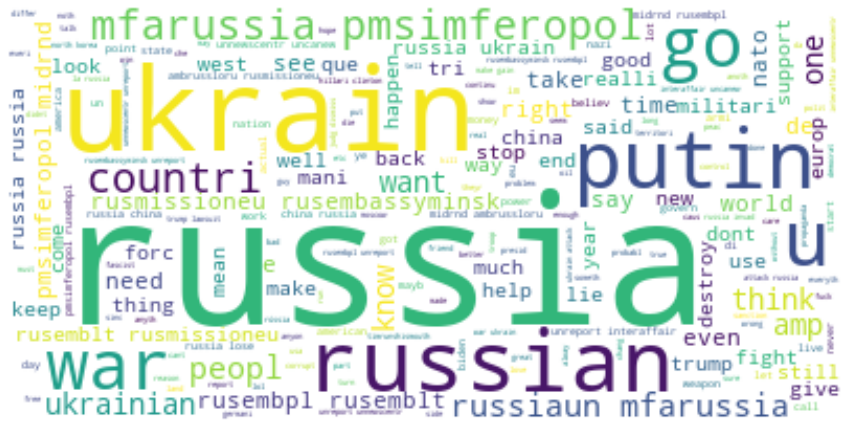

In [207]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [208]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df_sample["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_sample["tweet"]]
df_sample["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_sample["tweet"]]
df_sample["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df_sample["tweet"]]
df_sample = df_sample[["tweet", "Positive", "Negative", "Neutral"]]
df_sample.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,tweet,Positive,Negative,Neutral
0,ogrolandrat factor also thousand base aroun...,0.118,0.172,0.710
1,caitoz us play game long time come short everi...,0.167,0.000,0.833
2,timrunshismouth ukrain russia hill regain terr...,0.000,0.167,0.833
3,great maker youd think zelenskyy would better...,0.235,0.344,0.421
4,thehil funni russia drop bomb build hell video...,0.000,0.579,0.421


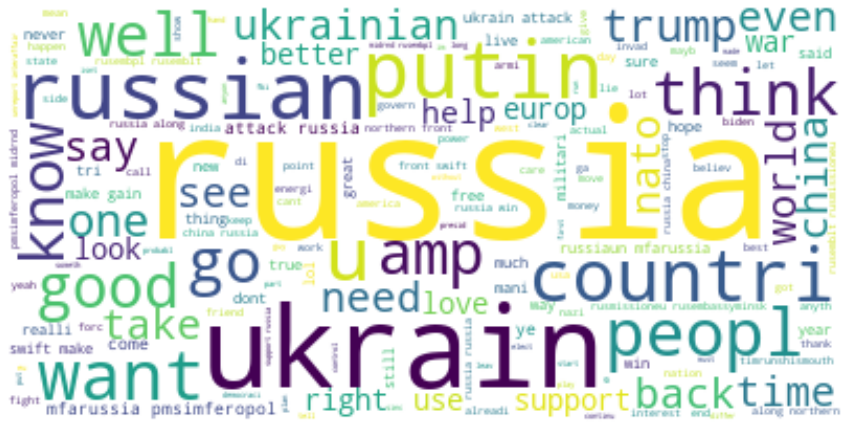

In [209]:
#positive
positive =' '.join([i for i in df_sample['tweet'][df_sample['Positive'] > df_sample["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

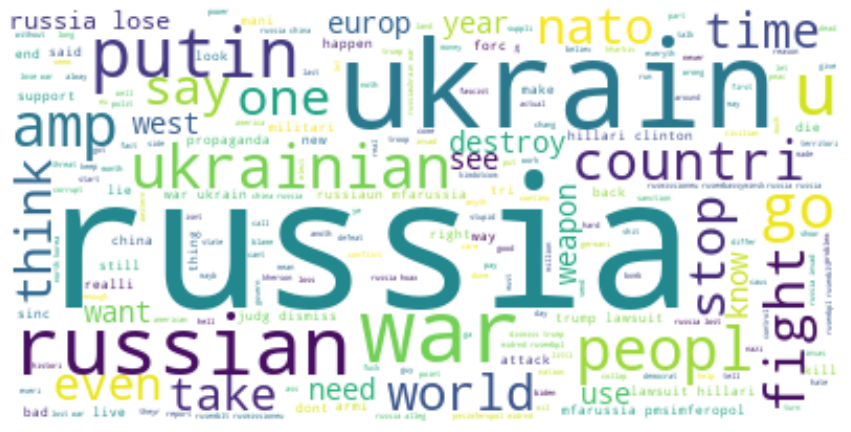

In [210]:
#negative 
negative =' '.join([i for i in df_sample['tweet'][df_sample['Negative'] > df_sample["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [211]:
df_sample.head()

,tweet,Positive,Negative,Neutral
0,ogrolandrat factor also thousand base aroun...,0.118,0.172,0.710
1,caitoz us play game long time come short everi...,0.167,0.000,0.833
2,timrunshismouth ukrain russia hill regain terr...,0.000,0.167,0.833
3,great maker youd think zelenskyy would better...,0.235,0.344,0.421
4,thehil funni russia drop bomb build hell video...,0.000,0.579,0.421


In [215]:
classes = ['Positive','Negative','Neutral']
def predict(text):
    text = clean(text)
    pos = sentiments.polarity_scores(text)["pos"]
    neg = sentiments.polarity_scores(text)["neg"]
    neu = sentiments.polarity_scores(text)["neu"] 
    return pos, neg, neu

In [213]:
text = "@JohnNob78300256 @Donal43680543 @Gibbonski_2 @OGRolandRat Then you have to factor that there are also thousands of bases around Russia that have to maintain garrisons from Vladivostok to St.Petersburg that can't leave their bases. The war is over, Russia has lost and it will take at least a decade or more to replace what was lost."

In [221]:
print(f"Sentiment Analysis Class '{classes[np.argmax(predict(text))]}' and Score {predict(text)[np.argmax(predict(text))]}")

Sentiment Analysis Class 'Neutral' and Score 0.71
